<a href="https://colab.research.google.com/github/sandrazivanovska/VNP/blob/main/Laboratory_exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv('/content/pollution_dataset.csv')

In [7]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [8]:
X = data.drop(columns=['Air Quality'], axis=1)

In [9]:
Y=data['Air Quality']

In [10]:
enc = LabelEncoder()
Y = enc.fit_transform(Y)

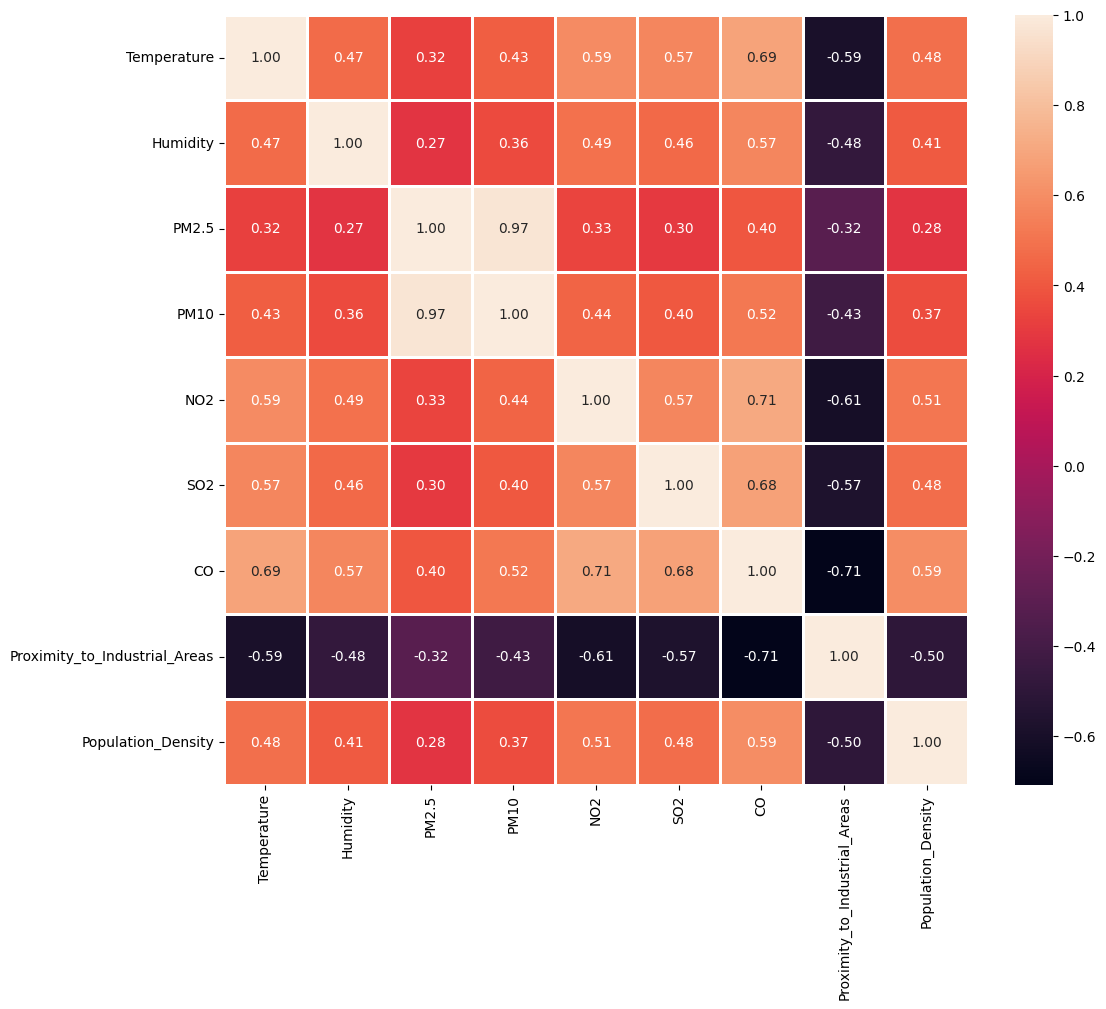

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[X.columns].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

<Axes: xlabel='Air Quality', ylabel='count'>

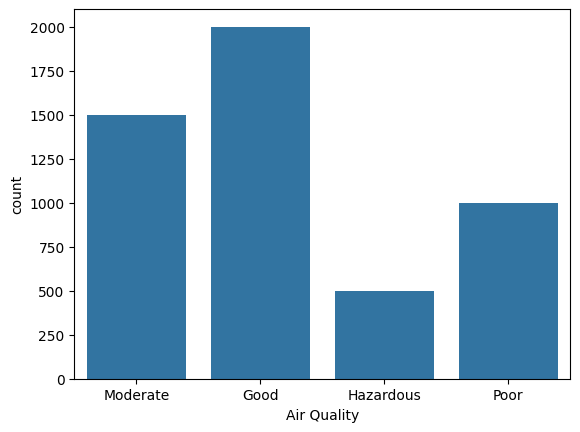

In [12]:
sns.countplot(data, x="Air Quality")

In [13]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
under_sampler = RandomUnderSampler(random_state=42)
train_x, train_y = under_sampler.fit_resample(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [15]:
pd.Series(train_y).value_counts()

,count
0,389
1,389
2,389
3,389


In [16]:
scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [17]:
X.shape[1]

9

# Model **1**

In [275]:
from tensorflow.keras.layers import Dense, LeakyReLU, Input, Dropout


In [284]:
model1 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, kernel_initializer="he_uniform", activation="relu"),
    Dropout(0.4),
    Dense(64, kernel_initializer="he_uniform", activation="relu"),
    Dropout(0.3),
    Dense(32, kernel_initializer="he_uniform", activation="relu"),
    Dense(4, kernel_initializer="he_uniform", activation="softmax")
])

In [285]:
model1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)

In [17]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,188 (4.64 KB)

 Trainable params: 1,188 (4.64 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
train_x.shape

(1556, 9)

In [49]:
test_x.shape

(1000, 9)

In [50]:
train_y.shape

(1556,)

In [51]:
test_y.shape

(1000,)

In [286]:
history1 = model1.fit(train_x, train_y, validation_split=0.1, epochs=50, batch_size=16)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3402 - loss: 1.3877 - val_accuracy: 0.0000e+00 - val_loss: 1.7170
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5872 - loss: 0.9603 - val_accuracy: 0.0064 - val_loss: 1.2992
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: 0.6957 - val_accuracy: 0.0321 - val_loss: 1.2415
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7520 - loss: 0.6049 - val_accuracy: 0.1218 - val_loss: 1.1804
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7851 - loss: 0.5747 - val_accuracy: 0.1154 - val_loss: 1.1846
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.5171 - val_accuracy: 0.2500 - val_loss: 1.1723
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4958 - val_accuracy: 0.2179 - val_loss: 1.2088
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.5008 - val_accuracy: 0.3718 - val_

<Axes: >

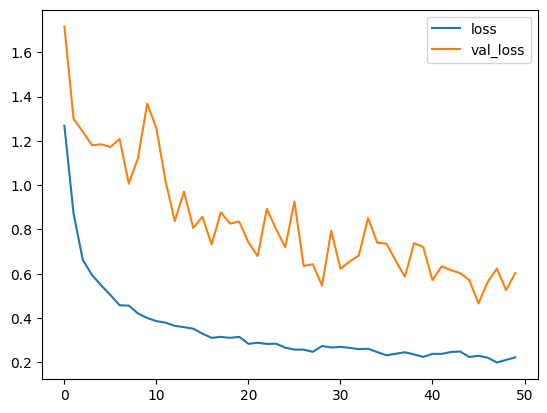

In [287]:
sns.lineplot(history1.history['loss'], label='loss')
sns.lineplot(history1.history['val_loss'], label='val_loss')

In [288]:
pred_y = model1.predict(test_x).round()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [23]:
import numpy as np

In [289]:
pred_y = np.argmax(pred_y, axis=1)

In [290]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.79      0.93      0.85       111
           2       0.94      0.97      0.96       294
           3       0.89      0.76      0.82       186

    accuracy                           0.94      1000
   macro avg       0.91      0.92      0.91      1000
weighted avg       0.94      0.94      0.94      1000



# Model **2**

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [202]:
model2 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, kernel_initializer='uniform', activation='relu'),
    Dropout(0.1),  # Додавање Dropout
    Dense(16, kernel_initializer='uniform', activation='relu'),
    Dense(16, kernel_initializer='uniform', activation='relu'),
    Dense(4, activation='softmax')
])

In [33]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)

In [34]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [69]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,852 (11.14 KB)

 Trainable params: 2,852 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
history2 = model2.fit(
    train_x, train_y,
    validation_split=0.1,
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping]
)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.2212 - val_accuracy: 0.8333 - val_loss: 0.5409
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9121 - loss: 0.2158 - val_accuracy: 0.6026 - val_loss: 0.7763
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9086 - loss: 0.2422 - val_accuracy: 0.8590 - val_loss: 0.4561
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: 0.2093 - val_accuracy: 0.7692 - val_loss: 0.5274
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 0.2084 - val_accuracy: 0.7628 - val_loss: 0.5655
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9220 - loss: 0.2121 - val_accuracy: 0.7949 - val_loss: 0.4624
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9193 - loss: 0.2028 - val_accuracy: 0.7821 - val_loss: 0.4952
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9182 - loss: 0.2032 - val_accuracy: 0.7692 - val_loss:

<Axes: >

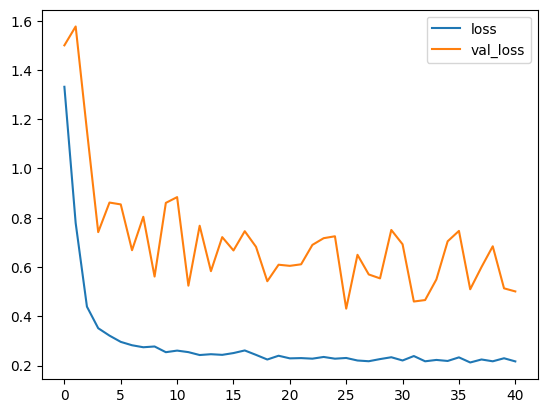

In [36]:
sns.lineplot(history2.history['loss'], label='loss')
sns.lineplot(history2.history['val_loss'], label='val_loss')

In [37]:
pred_y2 = model2.predict(test_x).round()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [38]:
pred_y2 = np.argmax(pred_y2, axis=1)

In [39]:
print(classification_report(test_y, pred_y2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.87      0.86      0.87       111
           2       0.93      0.98      0.95       294
           3       0.88      0.80      0.84       186

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.94      0.94      0.94      1000



Model 3

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
enc2 = OneHotEncoder(sparse_output=False)
Y_encoded = enc2.fit_transform(Y.reshape(-1,1))

In [45]:
Y_encoded

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [46]:
X_scaled = scaler.fit_transform(X)

In [47]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

In [73]:
from tensorflow.keras.regularizers import l2


In [123]:
model = Sequential([
    Input(shape=(train_x.shape[1],)),
    Dense(128, activation='relu', kernel_initializer='uniform', kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(64, activation='relu', kernel_initializer='uniform', kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(16, activation='relu', kernel_initializer='uniform', kernel_regularizer=l2(0.01)),
    Dense(4, activation='softmax')
])

In [124]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [125]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

In [126]:
history3 = model.fit(
    train_x2, train_y2,
    validation_split=0.1,
    epochs=80,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3738 - loss: 1.3756 - val_accuracy: 0.3800 - val_loss: 1.1502
Epoch 2/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4212 - loss: 1.0457 - val_accuracy: 0.4650 - val_loss: 0.9710
Epoch 3/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5139 - loss: 0.9258 - val_accuracy: 0.5550 - val_loss: 0.8959
Epoch 4/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 0.8616 - val_accuracy: 0.5850 - val_loss: 0.8348
Epoch 5/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - loss: 0.7987 - val_accuracy: 0.7750 - val_loss: 0.7801
Epoch 6/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8091 - loss: 0.7491 - val_accuracy: 0.8350 - val_loss: 0.7360
Epoch 7/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8370 - loss: 0.6966 - val_accuracy: 0.8275 - val_loss: 0.6879
Epoch 8/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8324 - loss: 0.6707 - val_accuracy: 0.

<Axes: >

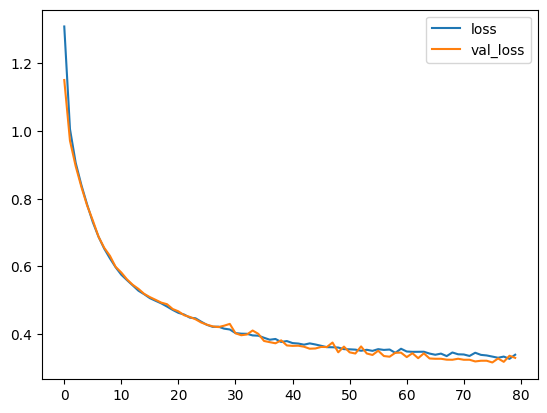

In [127]:
sns.lineplot(history3.history['loss'], label='loss')
sns.lineplot(history3.history['val_loss'], label='val_loss')

In [128]:
pred_y3 = model2.predict(test_x).round()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [135]:
import numpy as np
pred_y3 = np.argmax(pred_y2, axis=1)
test_y2_classes = np.argmax(test_y2, axis=1)


In [137]:
print(classification_report(test_y2_classes, pred_y3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.86      0.86      0.86       111
           2       0.95      0.94      0.95       294
           3       0.84      0.85      0.84       186

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000

